In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plot

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer() # Cargar el dataset

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
data.data.shape

(569, 30)

In [6]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
X, Y = data.data, data.target #Obtener los inputs y el target

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

In [11]:
N, D = X_train.shape 

In [12]:
N, D

(381, 30)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.16608308, -0.54567648, -0.2297505 , ..., -0.66043396,
        -0.24358907, -0.47482448],
       [ 0.18864652,  1.15261626,  0.15458451, ..., -0.66671881,
        -0.58616737, -0.65771116],
       [ 0.02000458, -0.77868128, -0.04794186, ..., -0.58900128,
        -0.26861762, -0.66424282],
       ...,
       [-0.76505273,  0.48963352, -0.77940454, ..., -0.46253784,
        -0.10593203,  0.20555751],
       [-0.71271558, -0.11329643, -0.74304281, ..., -0.7632909 ,
         0.64023167, -0.77201533],
       [-0.62839461, -0.43998358, -0.66144032, ..., -1.07140183,
         0.47441751, -1.0223959 ]], shape=(381, 30))

In [16]:
model = nn.Linear(D,1) # Remove the logits so the Loss function will do the operation



In [17]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [18]:
X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [19]:
n_epochs = 1000
seed = 42

# Set seed for PyTorch
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [20]:
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)



In [21]:
for it in range(n_epochs):
    optimizer.zero_grad()
    
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    loss.backward()
    optimizer.step()

    outputs_test = model(X_test) 
    loss_test =  criterion(outputs_test, y_test)

    train_losses[it] = loss.item()
    test_losses[it] = loss_test.item()

    if it % 50 == 0:
        print(f"Epoch: {it}/{n_epochs}, Train loss: {loss.item():.4f}, Test loss {loss_test.item():.4f}")

Epoch: 0/1000, Train loss: 0.7849, Test loss 0.8004
Epoch: 50/1000, Train loss: 0.5066, Test loss 0.5222
Epoch: 100/1000, Train loss: 0.3746, Test loss 0.3906
Epoch: 150/1000, Train loss: 0.3020, Test loss 0.3184
Epoch: 200/1000, Train loss: 0.2560, Test loss 0.2721
Epoch: 250/1000, Train loss: 0.2243, Test loss 0.2393
Epoch: 300/1000, Train loss: 0.2010, Test loss 0.2148
Epoch: 350/1000, Train loss: 0.1831, Test loss 0.1958
Epoch: 400/1000, Train loss: 0.1690, Test loss 0.1806
Epoch: 450/1000, Train loss: 0.1575, Test loss 0.1683
Epoch: 500/1000, Train loss: 0.1480, Test loss 0.1580
Epoch: 550/1000, Train loss: 0.1401, Test loss 0.1493
Epoch: 600/1000, Train loss: 0.1333, Test loss 0.1418
Epoch: 650/1000, Train loss: 0.1274, Test loss 0.1353
Epoch: 700/1000, Train loss: 0.1223, Test loss 0.1296
Epoch: 750/1000, Train loss: 0.1178, Test loss 0.1245
Epoch: 800/1000, Train loss: 0.1138, Test loss 0.1200
Epoch: 850/1000, Train loss: 0.1102, Test loss 0.1159
Epoch: 900/1000, Train loss: 0.

[]

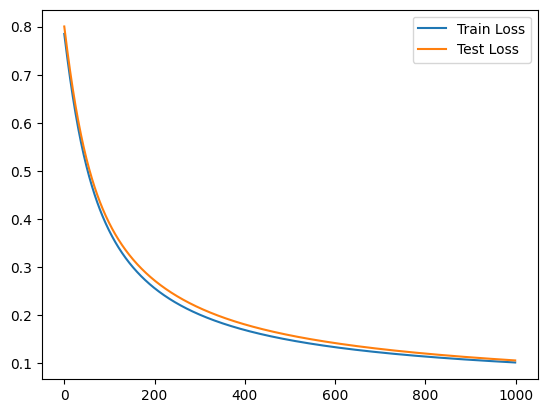

In [22]:
plot.plot(train_losses, label='Train Loss')
plot.plot(test_losses, label='Test Loss')
plot.legend()
plot.plot()

In [26]:
with torch.no_grad():
    p_train = model(X_train)
    p_train = p_train.numpy() > 0
    train_acc = np.mean(y_train.numpy() == p_train)

    p_test = model(X_test)
    p_test = p_test.numpy() > 0
    test_acc = np.mean(y_test.numpy() == p_test)

print(f"Train acc: {train_acc: .4f}, Test acc: {test_acc:.4f}")

    

Train acc:  0.9764, Test acc: 0.9787


In [55]:
torch.save(model.state_dict(), 'linear_classifier.pt')

In [ ]:
prod_model = nn.Sequential(
    nn.Linear(D,1),
    nn.Sigmoid()
)

prod_model.load_state_dict(torch.load('linear_classifier.pt'))

<All keys matched successfully>